In [26]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Read in the master dataframe
dataframe = pd.read_pickle('merged_dataset_eggs_1_2_08Jun2020_no_outliers.pkl')

In [32]:
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
2020-05-06 21:00:00,12.616167,24.993583,0.660000,1.148333,1.292500,46.819667,1.424098,83.103167,1.421316,99249.045000,0.357167,4.096667,4.454333,35.967500,8.168333,4.943000,3.225167,8.406333,29.086167
2020-05-06 22:00:00,11.522083,26.206583,0.626667,1.174167,1.292500,47.311583,1.424035,82.263167,1.421298,99245.081667,0.585833,4.881833,5.601667,34.020833,8.581667,5.195333,3.386167,7.750000,31.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


In [43]:
dataframe_new = dataframe.drop(dataframe[dataframe.index > '2020-05-25 16:00:00'].index)
dataframe_new

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
2020-05-06 21:00:00,12.616167,24.993583,0.660000,1.148333,1.292500,46.819667,1.424098,83.103167,1.421316,99249.045000,0.357167,4.096667,4.454333,35.967500,8.168333,4.943000,3.225167,8.406333,29.086167
2020-05-06 22:00:00,11.522083,26.206583,0.626667,1.174167,1.292500,47.311583,1.424035,82.263167,1.421298,99245.081667,0.585833,4.881833,5.601667,34.020833,8.581667,5.195333,3.386167,7.750000,31.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 09:00:00,36.405417,37.176750,9.630833,14.489167,16.160000,50.119083,1.426080,102.889750,1.422604,99649.335833,1.726617,5.433083,7.136000,41.396083,22.847817,14.147150,8.697433,996.159450,26.758517
2020-05-25 10:00:00,38.453917,33.694000,8.271667,11.318333,12.396667,55.088583,1.426201,126.489917,1.422631,99668.295000,0.567567,3.016567,3.584117,50.570633,17.558217,10.665000,6.892133,996.561733,28.900683
2020-05-25 14:00:00,35.510667,37.760167,10.394167,14.175833,14.654167,66.137833,1.425647,120.026083,1.422401,99672.089167,0.295300,3.735817,4.031100,65.850000,25.102767,14.554183,10.543317,996.079167,29.792433


0.0007955265134172995

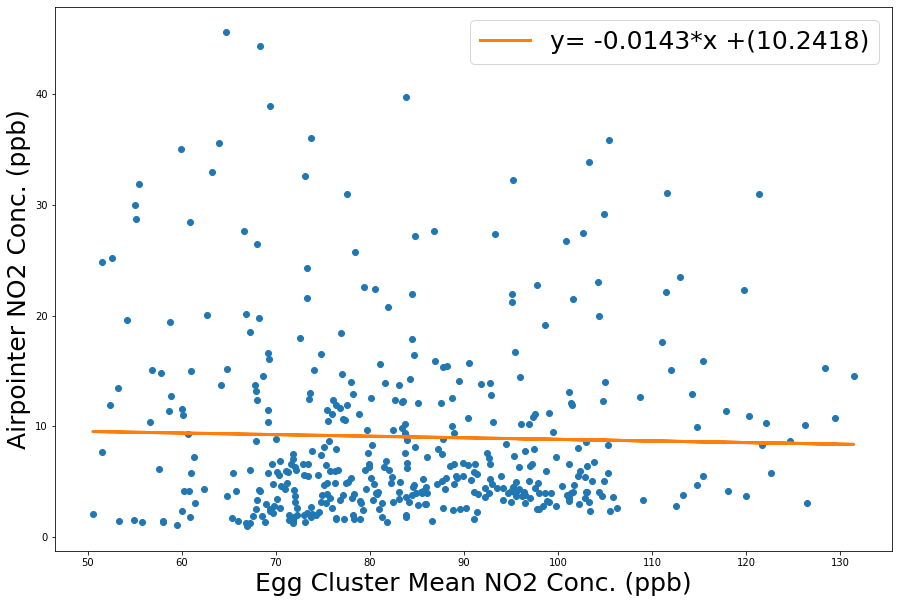

In [44]:
# Calculate a regression line
xValues = dataframe_new['NO2[ppb]'].to_numpy()
yValues = dataframe_new['Airpointer_NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

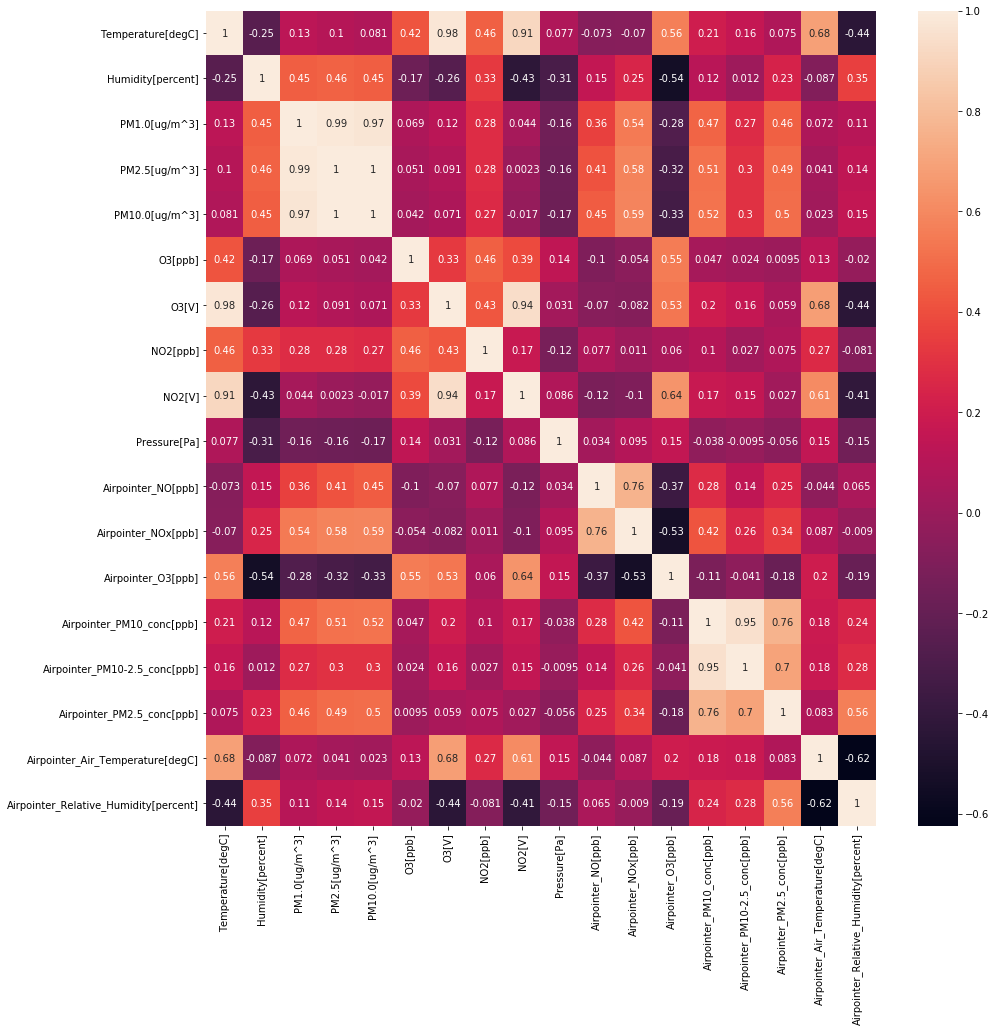

In [28]:
dataframe_new = dataframe.drop(columns=['Airpointer_NO2[ppb]'])
corrMatrix = dataframe_new.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

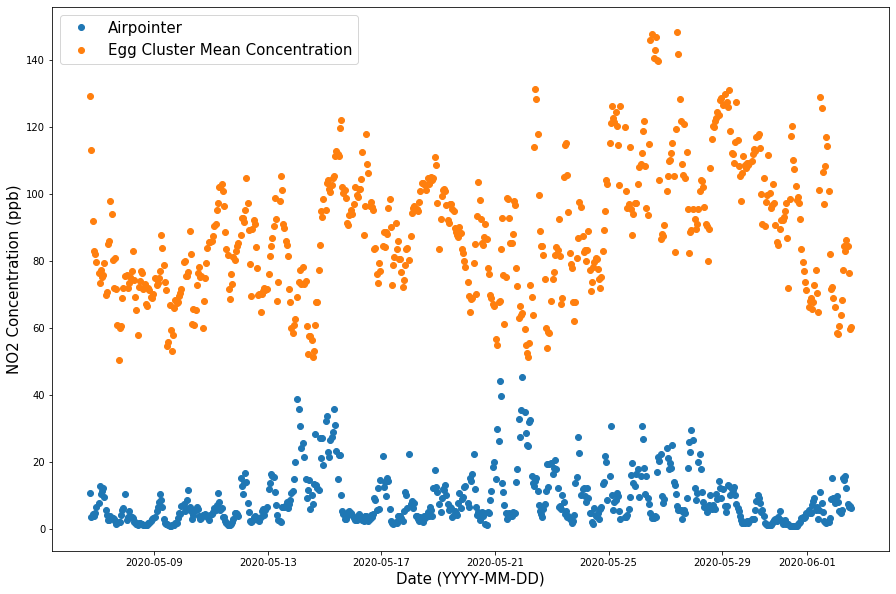

In [29]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o',label="Egg Cluster Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.0003980994356890255

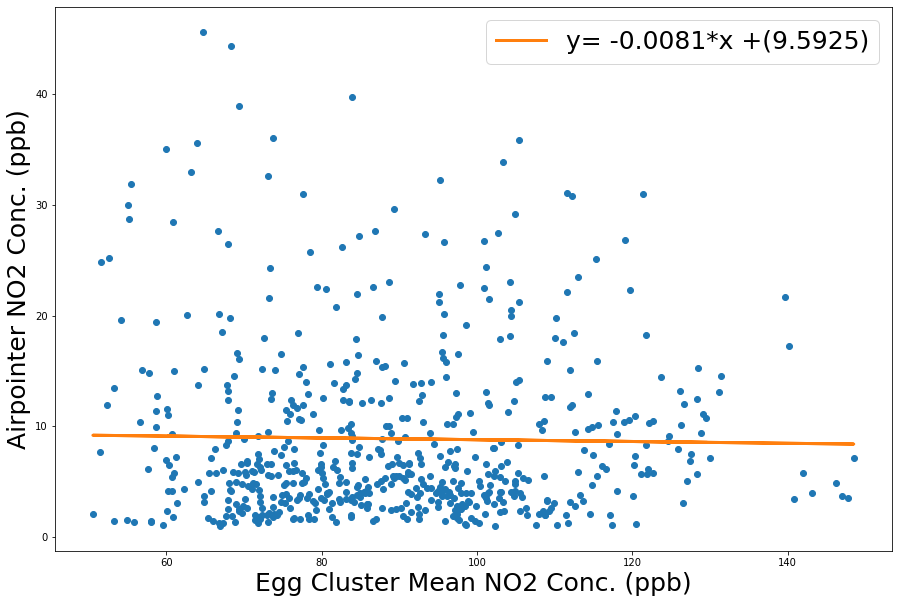

In [31]:
# Calculate a regression line
xValues = dataframe['NO2[ppb]'].to_numpy()
yValues = dataframe['Airpointer_NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [24]:
# -------------------- ALL THE DATASET FEATURES --------------------
# Convert to numpy array
# Seperate the target
# Remove the target from the DATA matrix 
DATA = dataframe.to_numpy()
target = DATA[:,11].reshape(-1,1)
DATA = np.delete(DATA, 10, 1)
# -------------------- ONLY EGG FEATURES --------------------
# Convert to numpy array
# Seperate the target
# Remove the target from the DATA matrix 
DATA_new = dataframe.to_numpy()
target_new = DATA_new[:,8].reshape(-1,1)
DATA_new = np.delete(DATA, slice(8,17,1), 1)

In [25]:
target

array([[ 1.45916667],
       [ 0.4095    ],
       [ 0.3155    ],
       [ 0.35716667],
       [ 0.58583333],
       [ 0.52366667],
       [ 0.4655    ],
       [ 0.53866667],
       [ 0.28783333],
       [ 1.26483333],
       [ 1.158     ],
       [ 2.06583333],
       [ 1.494     ],
       [ 1.41366667],
       [ 1.12116667],
       [ 0.871     ],
       [ 1.80083333],
       [ 0.9465    ],
       [ 0.95533333],
       [ 1.267     ],
       [ 1.24216667],
       [ 0.77283333],
       [ 0.56483333],
       [ 0.412     ],
       [ 0.327     ],
       [ 0.262     ],
       [ 0.54233333],
       [ 0.488     ],
       [ 0.78383333],
       [ 0.24066667],
       [ 0.25033333],
       [ 0.67866667],
       [ 1.088     ],
       [ 1.12816667],
       [ 2.16366667],
       [ 1.2345    ],
       [ 1.666     ],
       [ 1.25066667],
       [ 1.37033333],
       [ 1.40983333],
       [ 1.9765    ],
       [ 1.12983333],
       [ 1.15016667],
       [ 1.077     ],
       [ 1.016     ],
       [ 0

In [16]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
R2 = metrics.r2_score(target, elastic_net.predict(DATA))
adjusted_R2 = 1 - ((1-R2**2)*(np.size(DATA[:,0],0)-1))/(np.size(DATA[:,0],0) - np.size(DATA[:0],1) - 1)
print('R2: {:0.4f}'.format(R2))
print('adjusted-R2: {:0.4f}'.format(adjusted_R2))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.829916
Test set score: 0.829394
MAE: 0.0001
R2: 0.8298
adjusted-R2: 0.6792
Estimator feature strengths: [ 1.99639159e-05 -3.46865245e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.92901217e-07
 -3.59485017e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.04223804e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.88634451e-07  0.00000000e+00]


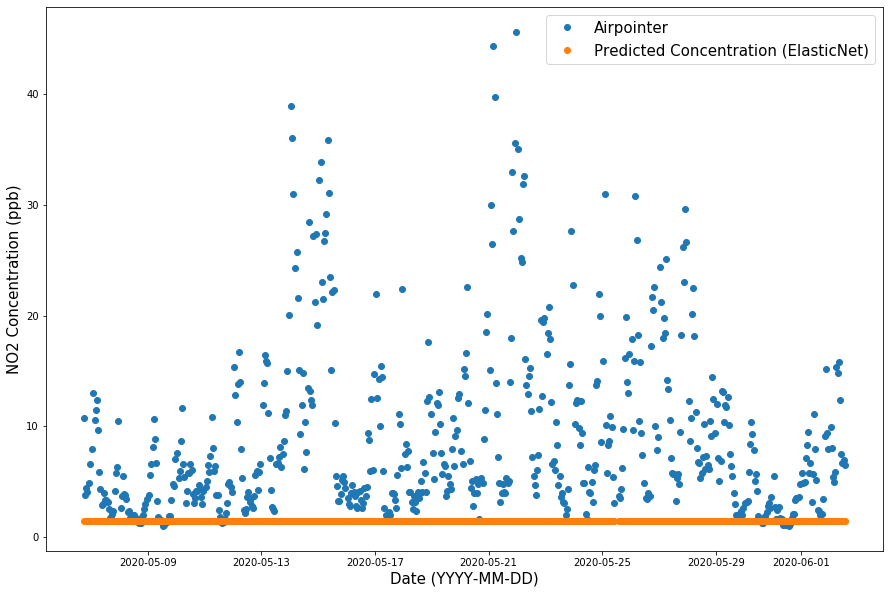

In [17]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), elastic_net.predict(DATA), 'o',label="Predicted Concentration (ElasticNet)")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

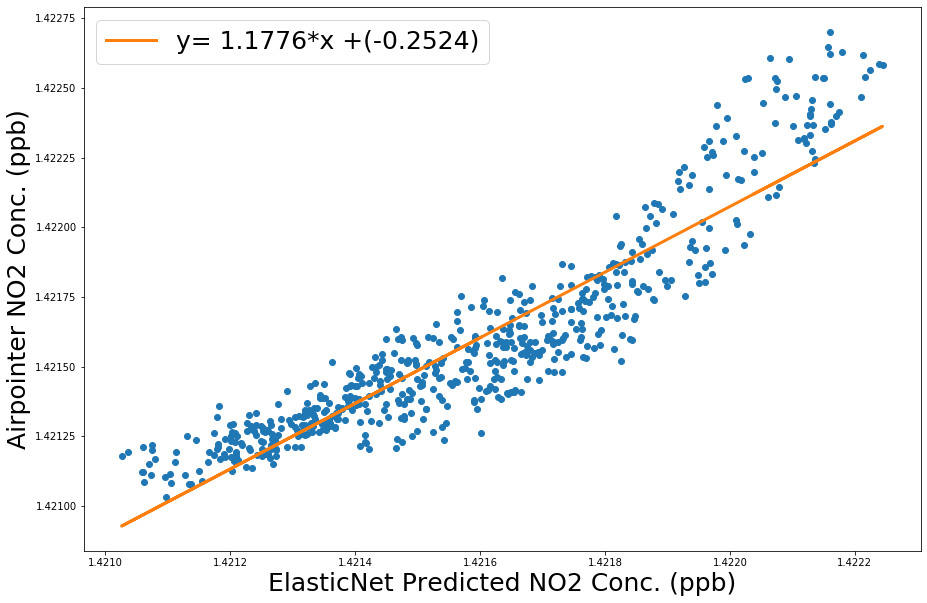

In [14]:
# Calculate a regression line
xValues = elastic_net.predict(DATA).reshape(-1,1)
yValues = target
linear_regression = LinearRegression().fit(xValues, yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0][0], linear_regression.intercept_[0]),
         linewidth=3)
plt.xlabel('ElasticNet Predicted NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)